In [1]:
# # perform this in colab first:
# !git clone https://github.com/kyleoneil/MLProjs.git
# import os
# os.chdir('MLProjs')
# print('we are currently at:', os.getcwd())

# load dataset

In [2]:
# https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt # plotting
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [3]:
import re
import os
import numpy as np
import pandas as pd

data = pd.read_csv('a_z_handwritten_data.csv')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(data.head())
print(data.shape)

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(372450, 785)


In [5]:
import csv

# Define the kana characters and their corresponding labels
letters =[chr(i) for i in range(65, 91)]
letters 

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [7]:
num_samples = 372450
num_classes = 26  # Number of letters in the alphabet

# data.insert(0, 'alphabet', np.random.randint(0, num_classes, size=num_samples))

# Add column names
columns = ['alphabet'] + [f'pixel_{i}' for i in range(1, 785)]
data.columns = columns
data.columns

Index(['alphabet', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'pixel_784'],
      dtype='object', length=785)

In [15]:
from tensorflow.keras.utils import to_categorical

# X = np.random.randint(0, 256, size=(num_samples, 784))
# y = np.random.randint(0, num_classes, size=(num_samples,))
# X = X.reshape(-1, 28, 28, 1)
# X = X / 255.0
# y = to_categorical(y, num_classes)
y = data['alphabet']
X = data.drop('alphabet', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape,


((260715, 784), (111735, 784))

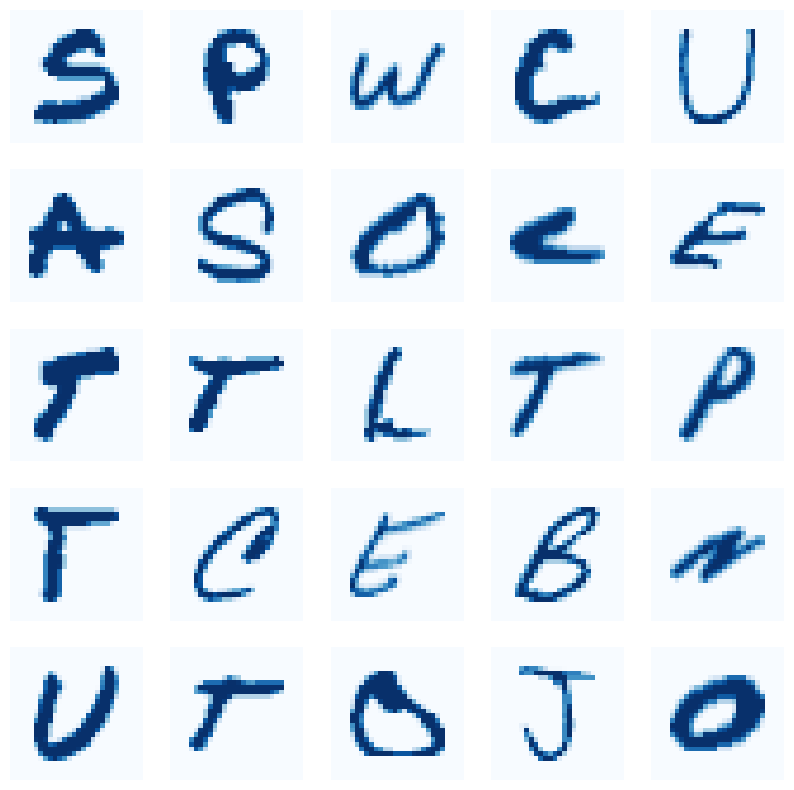

In [17]:
random_indices = np.random.choice(range(len(X)), size=25, replace=False)
_, axes = plt.subplots(5, 5, figsize=(10, 10))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(X.iloc[random_indices[i]].values.reshape(28, 28), cmap='Blues')
    ax.axis('off')
plt.show()

In [49]:
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Reshape((X_train.shape[1], 1)),  # Reshape to (784, 1)
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

c:\Users\KYLEONEIL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10


c:\Users\KYLEONEIL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8144/8148 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5378 - loss: 1.8786

c:\Users\KYLEONEIL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8148/8148 ━━━━━━━━━━━━━━━━━━━━ 61s 7ms/step - accuracy: 0.5378 - loss: 1.8782 - val_accuracy: 0.9239 - val_loss: 0.2803
Epoch 2/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.8239 - loss: 0.5876 - val_accuracy: 0.9501 - val_loss: 0.1794
Epoch 3/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.8845 - loss: 0.3910 - val_accuracy: 0.9556 - val_loss: 0.1541
Epoch 4/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.9082 - loss: 0.3116 - val_accuracy: 0.9594 - val_loss: 0.1434
Epoch 5/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - accuracy: 0.9231 - loss: 0.2588 - val_accuracy: 0.9669 - val_loss: 0.1166
Epoch 6/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.9319 - loss: 0.2248 - val_accuracy: 0.9699 - val_loss: 0.1098
Epoch 7/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.9382 - loss: 0.2021 - val_accuracy: 0.9716 - val_loss: 0.1024
Epoch 8/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 51s 6ms/step - accuracy: 0.9437 - loss: 0.1824 - val

In [28]:
model = tf.keras.models.Sequential()
model.add(layers.InputLayer(shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(26, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary() 

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

3492/3492 ━━━━━━━━━━━━━━━━━━━━ 2s 492us/step - accuracy: 0.0824 - loss: 134.9417
Test Accuracy: 8.27%


In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 991us/step - accuracy: 0.3381 - loss: 7.4145 - val_accuracy: 0.6689 - val_loss: 1.2027
Epoch 2/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 983us/step - accuracy: 0.7069 - loss: 1.0664 - val_accuracy: 0.8024 - val_loss: 0.7220
Epoch 3/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 963us/step - accuracy: 0.8247 - loss: 0.6318 - val_accuracy: 0.8795 - val_loss: 0.4375
Epoch 4/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 992us/step - accuracy: 0.8936 - loss: 0.3854 - val_accuracy: 0.9141 - val_loss: 0.3239
Epoch 5/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9229 - loss: 0.2831 - val_accuracy: 0.9267 - val_loss: 0.2722
Epoch 6/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9364 - loss: 0.2285 - val_accuracy: 0.9368 - val_loss: 0.2397
Epoch 7/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 943us/step - accuracy: 0.9445 - loss: 0.1964 - val_accuracy: 0.9418 - val_loss: 0.2174
Epoch 8/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 8s 948us/step - accuracy: 0.9507 - los